In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [5]:
df = pd.read_csv('data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [8]:
df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


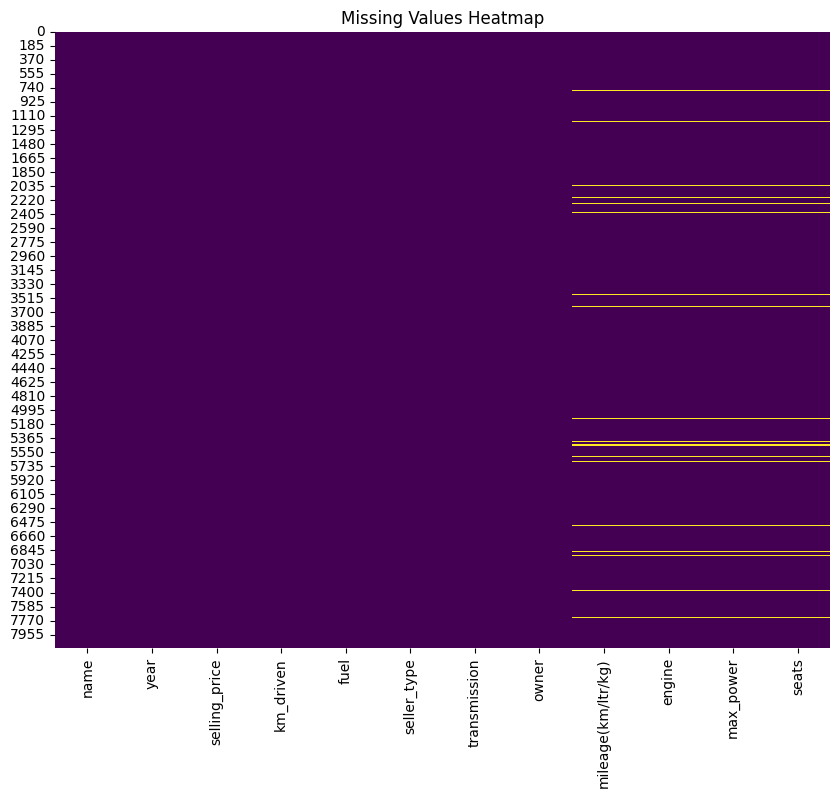

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

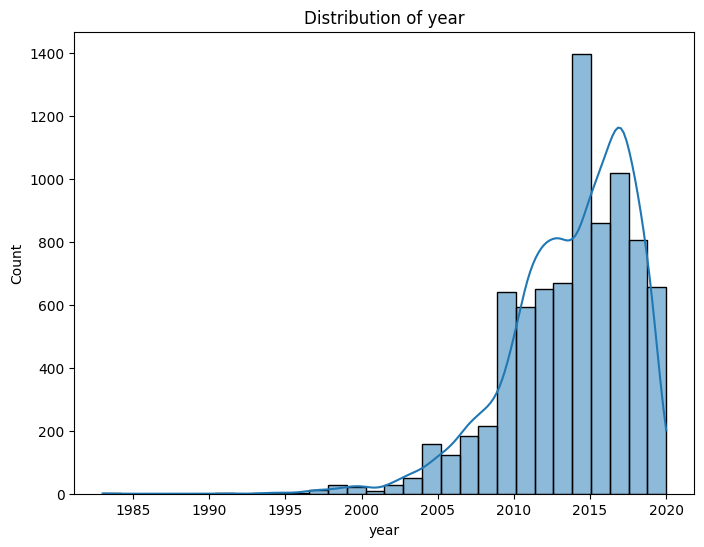

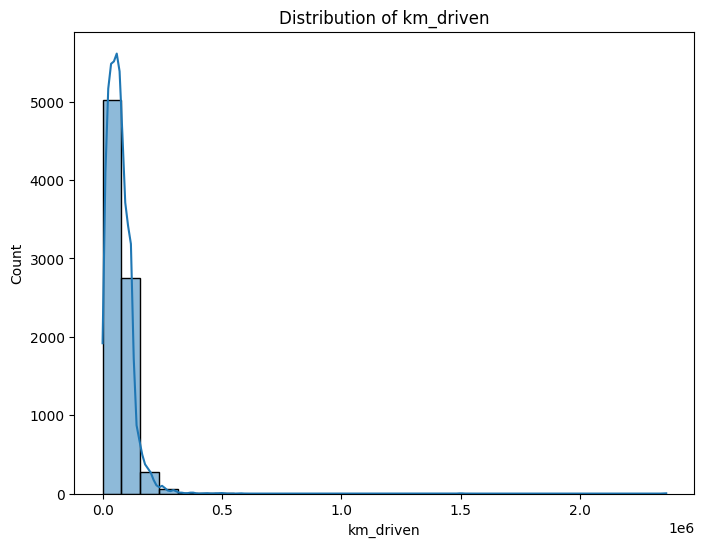

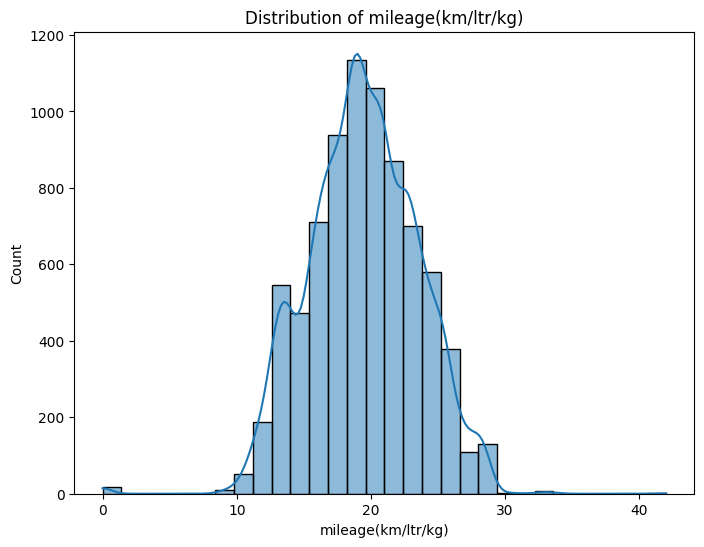

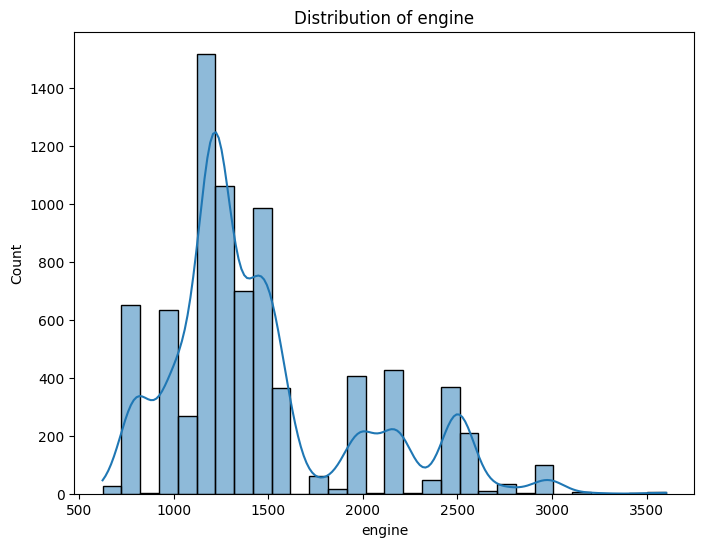

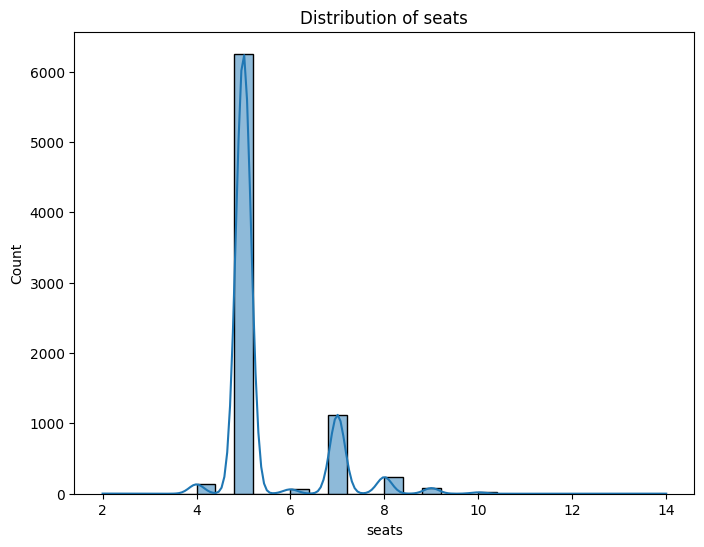

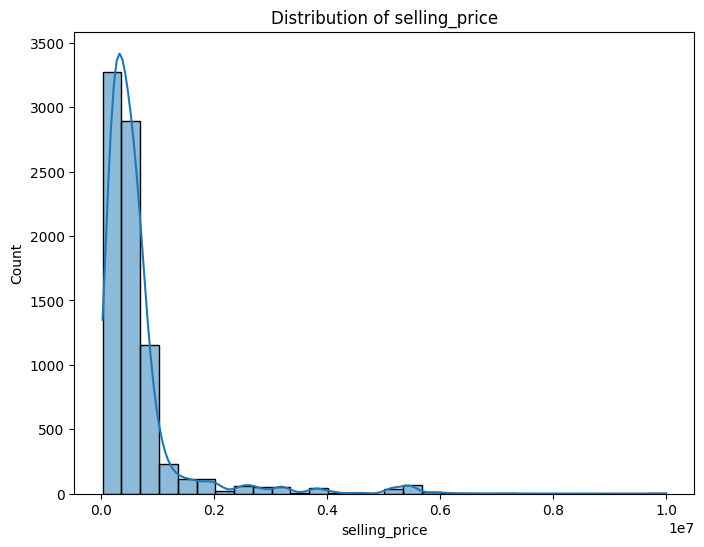

In [11]:
features = ['year','km_driven','mileage(km/ltr/kg)','engine','seats','selling_price']
for feature in features:
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

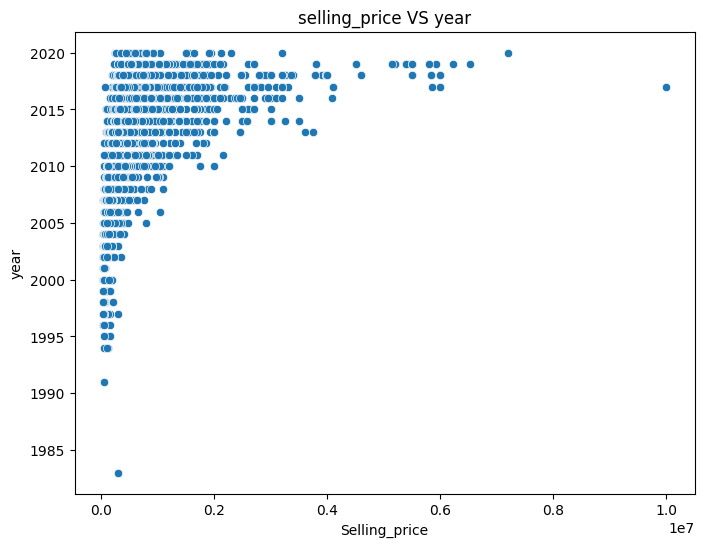

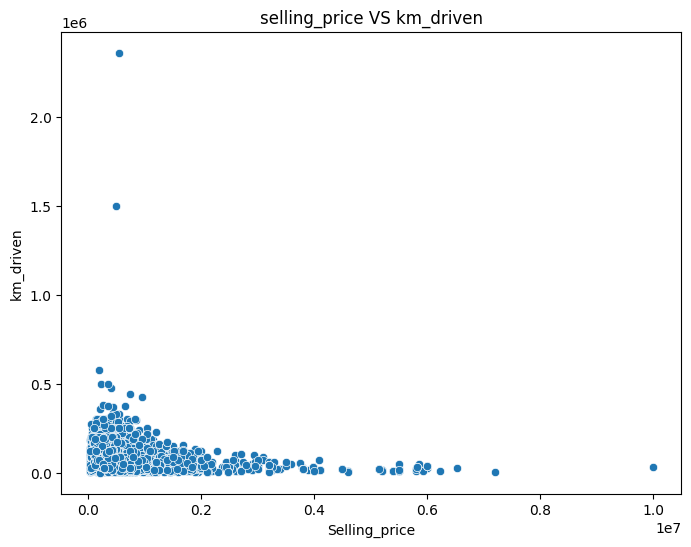

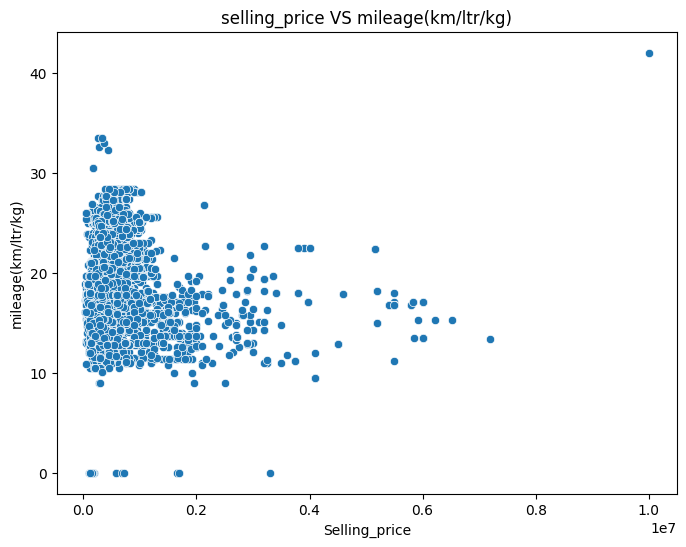

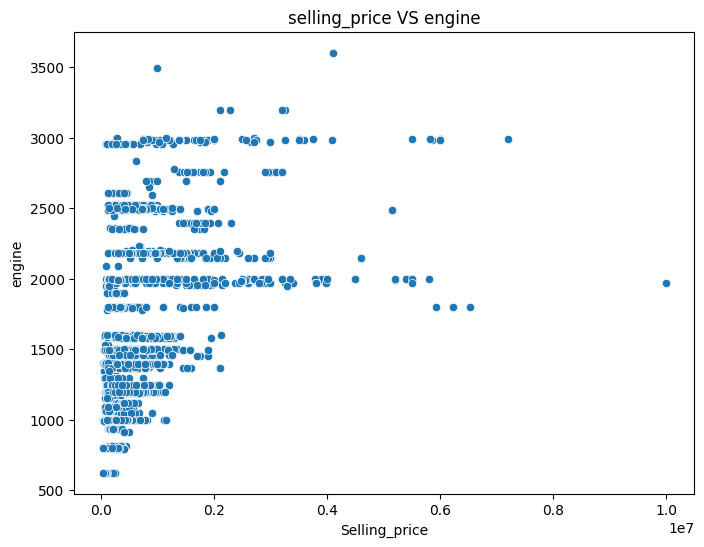

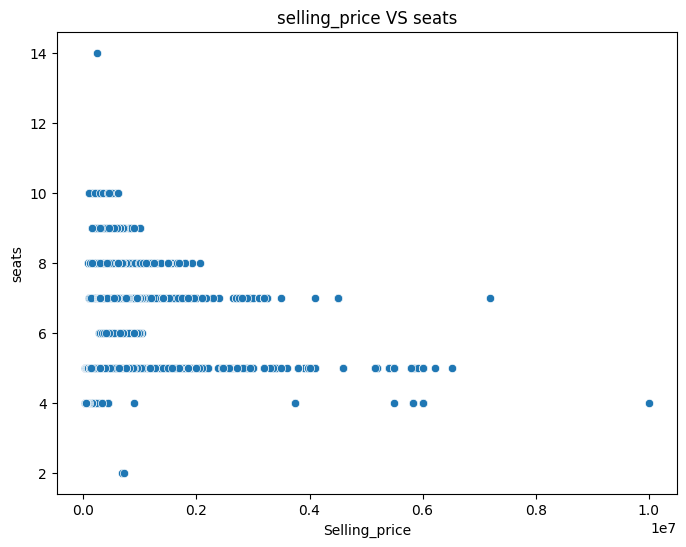

In [12]:
features = ['year','km_driven','mileage(km/ltr/kg)','engine','seats',]
for feature in features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='selling_price', y=feature, data=df)
    plt.title(f"selling_price VS {feature}")
    plt.xlabel("Selling_price")
    plt.ylabel(f"{feature}")
    plt.show()

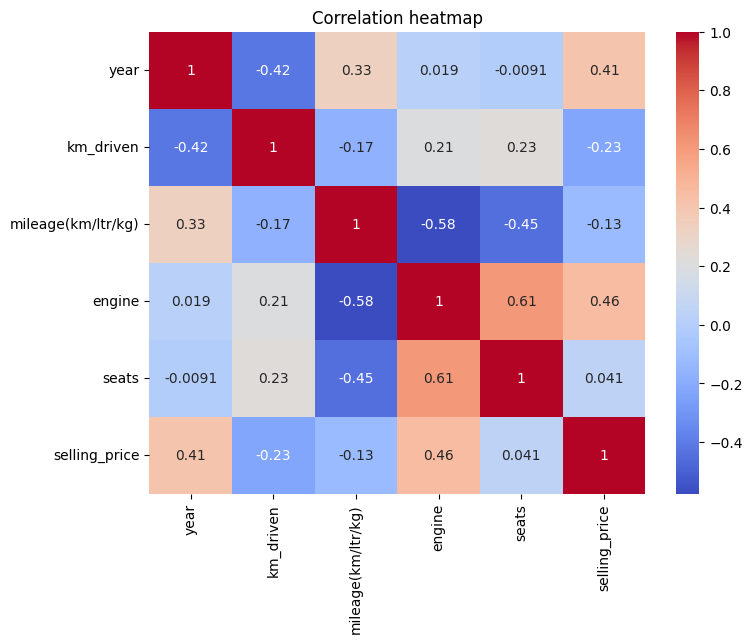

In [13]:
selected_features = df[['year','km_driven','mileage(km/ltr/kg)','engine','seats','selling_price']]
plt.figure(figsize=(8,6))
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

<Figure size 1200x1000 with 0 Axes>

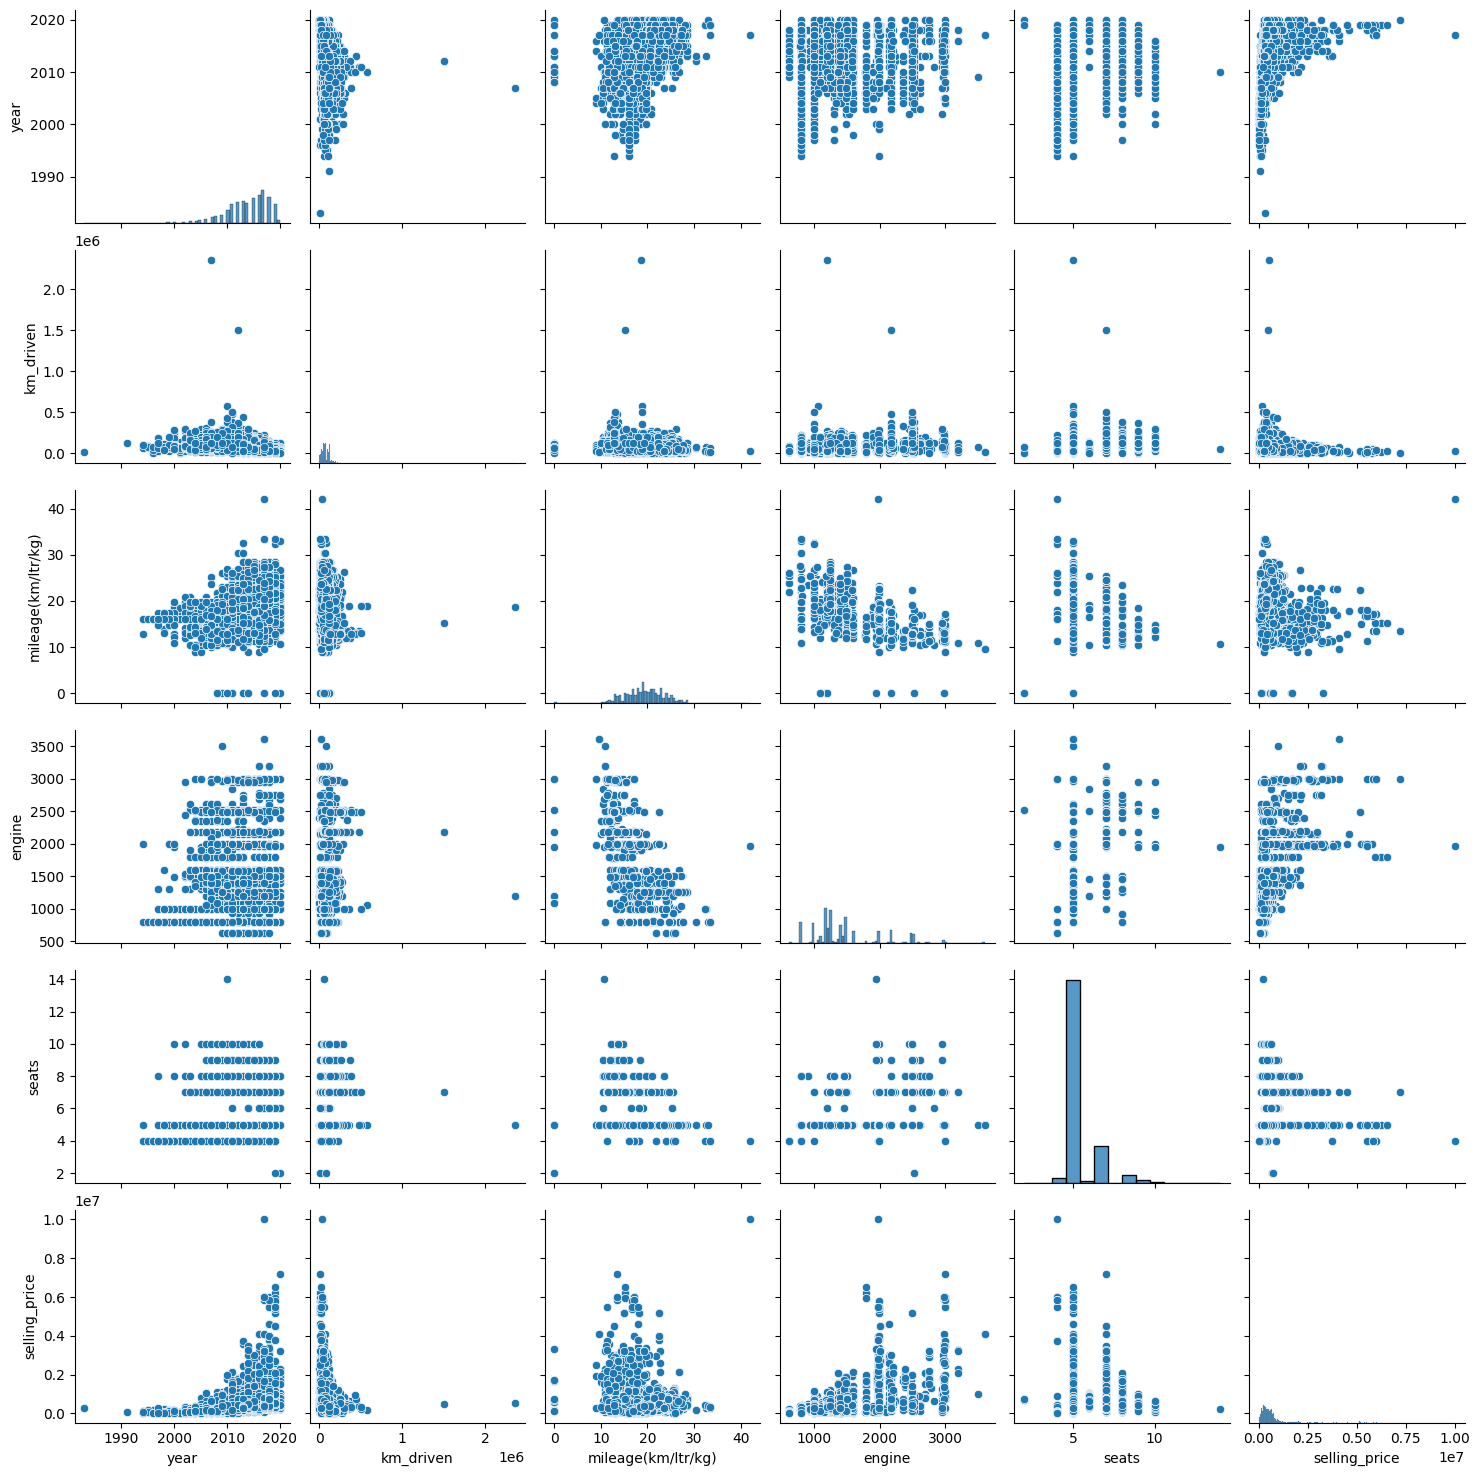

In [31]:
plt.figure(figsize=(12,10))
sns.pairplot(selected_features)
plt.show()

# Insights

#### **1. Data Types and Non Null Counts:**
- The dataset contains **8128** data entries and **12** columns.
- **Data Types:** There are 6 columns with `object` data type, 3 columns with `int64` data type and 3 colummns with `float64` data type.
- **Numerical Features:** These include features like `year`, `km_driven`, `selling_price`, `seats`, etc.
- **Categorical Features:** Features like `fuel`, `seller_type`, `transmission`, `max_power`, etc., are categorical.

#### **2. Summary Statistics:**
- **Numerical Features:**
  - The target variable `selling_price` has a mean of *6,38,271* and a standard deviation of *8,06,253*.
  - `year` ranges from *1983 to 2020*, indicating that dataset contains both very old and relatively new cars.
  - `seats` range from *2 to 14*, with a mean of *5* seats.
  - `mileage` shows a spread from *0km to 42km* with a mean of *19.41km*.
  - `km_driven` shows a vast spread from *1km to 23,60,457km*, with a mean of *69819.5km*, which significantly imapcts the `selling_price`.
- **Categorical Features:**
  - `fuel` has *4 unique values* with **Diesel** being the most common.
  - `Transmission` has *2 unique values* with **Manual** being the most common.
  - `owner` has *5 unique values* with **First Owner** being the most common.
  - These features will be crucial in predicting the `selling_price`.

#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values:**
  - Features like `Engine`,`mileage`,`max_power` and `seats` have more than *200* missing values, which need to be addressed.
 
#### **4. Univariate Analysis:**
- **selling_price Distribution(Numerical Feature):**
  - The distribution of `selling_price` is positively skewed, with the majority of cars lying between Rs.30,000 and Rs.7,00,000. The peak frequency is near around Rs.2,00,000.
  - This skewness suggests that most cars in the dataset are affordable. The long tail on the right side indicates a small number of high end cars, which need special consideration during modelling.

#### **5. Bivariate Analysis:**
- There is a strong positive correlation between `selling_price` and both `year` and `km_driven`. The less driven and newer cars show a much higher selling price.
- The cars with a moderate `mileage`, near around *20 km/l* and `engine` around *2000 cc* show a decent selling price, with some outliers.
- Mostly cars sold have *5 seats* with a decent selling price.

# Issues to be addressed
#### **1. Handling Missing Data**
#### **2. Outlier Detection and Handling**
#### **3. Categorical Encoding**
#### **4. Feature Engineering**
#### **5. Correlation and Multi-Collinearity**

In [16]:
df['max_power'] = df['max_power'].str.replace(' ','')
df['max_power'] = pd.to_numeric(df['max_power'])

AttributeError: Can only use .str accessor with string values!

In [17]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [18]:
df = pd.get_dummies(df, columns=['fuel', 'transmission', 'owner', 'seller_type'], dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7906 non-null   object 
 1   year                          7906 non-null   int64  
 2   selling_price                 7906 non-null   int64  
 3   km_driven                     7906 non-null   int64  
 4   mileage(km/ltr/kg)            7906 non-null   float64
 5   engine                        7906 non-null   float64
 6   max_power                     7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   fuel_CNG                      7906 non-null   float64
 9   fuel_Diesel                   7906 non-null   float64
 10  fuel_LPG                      7906 non-null   float64
 11  fuel_Petrol                   7906 non-null   float64
 12  transmission_Automatic        7906 non-null   float64
 13  transmis

In [19]:
df.head()

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,...,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df = df.drop(columns=['name'])
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [9]:
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lir = LinearRegression()

models = [rfr, etr, abr, gbr, xgb, lir]
names = ['Random Forest', 'Extra Trees', 'Ada Boost', 'Gradient Boosting', 'XGBoost', 'Linear Regression']

In [10]:
r2s = []
mses = []

for name, model in zip(names, models):
    print("*"*30,"\n",name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    print("r2:", r2)
    print("\n")
    mses.append(mse)
    r2s.append(r2)

****************************** 
 Random Forest
MSE: 14116560208.038733
r2: 0.9756951105661141


****************************** 
 Extra Trees
MSE: 15042252443.23438
r2: 0.9741013195083305


****************************** 
 Ada Boost
MSE: 149648340993.0241
r2: 0.7423461290712532


****************************** 
 Gradient Boosting
MSE: 23396888594.6415
r2: 0.9597169011423986


****************************** 
 XGBoost
MSE: 14411123712.0
r2: 0.9751879572868347


****************************** 
 Linear Regression
MSE: 185225474203.09924
r2: 0.6810919512614848




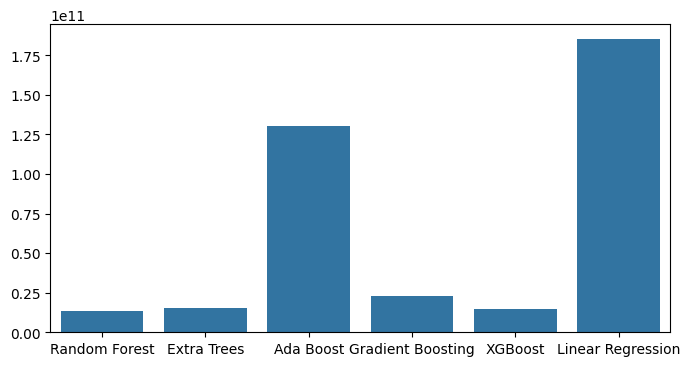

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x=names, y=mses)
plt.show()

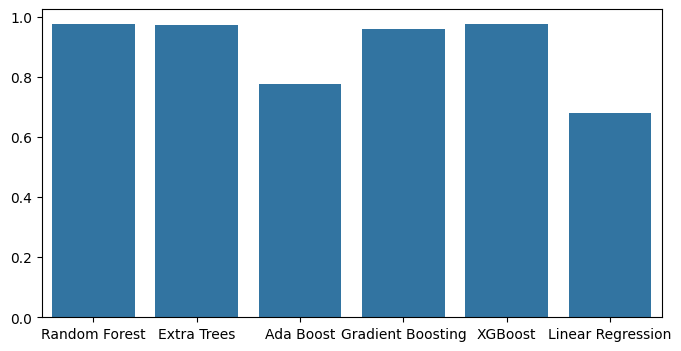

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x=names, y=r2s)
plt.show()

In [19]:
final_model = rfr

In [76]:
pickle.dump(final_model, open("model.pkl", "wb"))